In [33]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist


In [35]:
 #Load and preprocess data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
# Encode labels
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)  # Correctly transform Y_test

In [36]:
# Define the network architecture
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))


In [37]:
# Compile the model
gd = SGD(0.01)
epochs = 10
model.compile(loss="categorical_crossentropy", optimizer=gd, metrics=["accuracy"])

# Train the model
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=128)     

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1345 - loss: 2.3147 - val_accuracy: 0.2945 - val_loss: 2.2466
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3260 - loss: 2.2339 - val_accuracy: 0.4536 - val_loss: 2.1842
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4866 - loss: 2.1687 - val_accuracy: 0.5558 - val_loss: 2.0972
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5566 - loss: 2.0753 - val_accuracy: 0.6216 - val_loss: 1.9723
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5993 - loss: 1.9410 - val_accuracy: 0.6432 - val_loss: 1.8022
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6291 - loss: 1.7664 - val_accuracy: 0.6578 - val_loss: 1.6064
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6529 - loss: 1.5713 - val_accuracy: 0.6885 - val_loss: 1.4192
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6838 - loss: 1.3912 - val_accuracy: 0.

In [38]:
#evalute
prediction = model.predict(X_test,batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


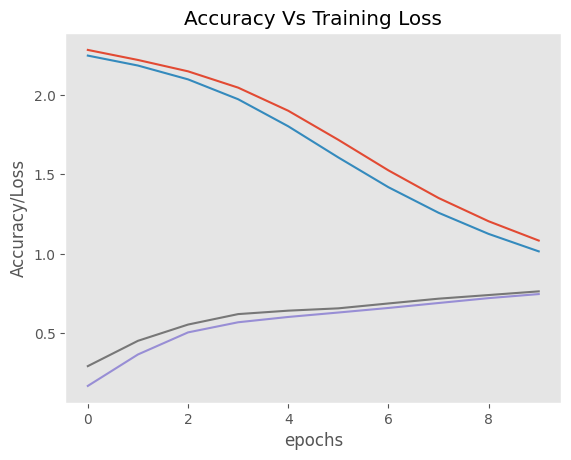

In [46]:
#plot
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="var_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="var_accuracy")
plt.title("Accuracy Vs Training Loss")
plt.xlabel("epochs")
plt.ylabel("Accuracy/Loss")  
plt.grid(False)
plt.show()        